In [2]:
! pip install openpyxl
! pip install seaborn

In [3]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv
import datetime as dt
import calendar
import warnings
import openpyxl
warnings.filterwarnings('ignore')
# File to Load (Remember to Change These)
adidas_sales_data_to_load = "../data/Adidas US Sales Datasets.xlsx"
# Convert xlsx to csv
adidas_sales_df = pd.read_excel(adidas_sales_data_to_load)
# Save to file
adidas_sales_df.to_csv("../data/adidas_sales_df.csv", index=False, header=True)

In [4]:
# load adidas_sales_df.csv
adidas_sales_df = pd.read_csv("../data/adidas_sales_df.csv")
adidas_sales_df.head(10)
# drop rows 0-2 and columns 0 and make (row, column) = (3,1) to (3, 14) the new header
adidas_sales_df = adidas_sales_df.iloc[3:, 1:14]
adidas_sales_df.head(10)
# rename columns the same as row 3
adidas_sales_df.columns = adidas_sales_df.iloc[0]
adidas_sales_df.head(10)
# drop row 3
adidas_sales_df = adidas_sales_df.iloc[1:]
adidas_sales_df.head(10)
# save to file
adidas_sales_df.to_csv("../data/adidas_sales_df.csv", index=False, header=True)
# load adidas_sales_df.csv
adidas_sales_df = pd.read_csv("../data/adidas_sales_df.csv")
adidas_sales_df.head(10)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store
5,Foot Locker,1185732,2020-01-06 00:00:00,Northeast,New York,New York,Women's Apparel,50.0,1000,500000.0,125000.0,0.25,In-store
6,Foot Locker,1185732,2020-01-07 00:00:00,Northeast,New York,New York,Men's Street Footwear,50.0,1250,625000.0,312500.0,0.50,In-store
7,Foot Locker,1185732,2020-01-08 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50.0,900,450000.0,135000.0,0.30,Outlet
8,Foot Locker,1185732,2020-01-21 00:00:00,Northeast,New York,New York,Women's Street Footwear,40.0,950,380000.0,133000.0,0.35,Outlet
9,Foot Locker,1185732,2020-01-22 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45.0,825,371250.0,129937.5,0.35,Outlet


In [5]:
# Create a new column "Year" and "Month" and "Day" from "Date" column
adidas_sales_df['Year'] = pd.DatetimeIndex(adidas_sales_df['Invoice Date']).year
adidas_sales_df['Month'] = pd.DatetimeIndex(adidas_sales_df['Invoice Date']).month
adidas_sales_df['Day'] = pd.DatetimeIndex(adidas_sales_df['Invoice Date']).day
adidas_sales_df.head(10)
# save to file
adidas_sales_df.to_csv("../data/adidas_sales_df.csv", index=False, header=True)
# load adidas_sales_df.csv
adidas_sales_df = pd.read_csv("../data/adidas_sales_df.csv")
adidas_sales_df.head(10)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Year,Month,Day
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,2020,1,1
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,2020,1,2
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,2020,1,3
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,2020,1,4
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store,2020,1,5
5,Foot Locker,1185732,2020-01-06 00:00:00,Northeast,New York,New York,Women's Apparel,50.0,1000,500000.0,125000.0,0.25,In-store,2020,1,6
6,Foot Locker,1185732,2020-01-07 00:00:00,Northeast,New York,New York,Men's Street Footwear,50.0,1250,625000.0,312500.0,0.50,In-store,2020,1,7
7,Foot Locker,1185732,2020-01-08 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50.0,900,450000.0,135000.0,0.30,Outlet,2020,1,8
8,Foot Locker,1185732,2020-01-21 00:00:00,Northeast,New York,New York,Women's Street Footwear,40.0,950,380000.0,133000.0,0.35,Outlet,2020,1,21
9,Foot Locker,1185732,2020-01-22 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45.0,825,371250.0,129937.5,0.35,Outlet,2020,1,22


In [6]:
# Change the columns of the df to be: ['Retailer', 'Retailer ID','Invoice Date', 'Day','Month', 'Year','Region', 'State', 'City',
#       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
#       'Operating Profit', 'Operating Margin']
adidas_sales_df = adidas_sales_df[['Retailer', 'Retailer ID','Invoice Date', 'Day','Month', 'Year','Region', 'State', 'City',
         'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
            'Operating Profit', 'Operating Margin', 'Sales Method']]
adidas_sales_df.head(10)
# save to file
adidas_sales_df.to_csv("../data/adidas_sales_df.csv", index=False, header=True)
# load adidas_sales_df.csv
adidas_sales_df = pd.read_csv("../data/adidas_sales_df.csv")
adidas_sales_df.head(10)

,Retailer,Retailer ID,Invoice Date,Day,Month,Year,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,1,1,2020,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,2,1,2020,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,3,1,2020,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,4,1,2020,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,5,1,2020,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store
5,Foot Locker,1185732,2020-01-06 00:00:00,6,1,2020,Northeast,New York,New York,Women's Apparel,50.0,1000,500000.0,125000.0,0.25,In-store
6,Foot Locker,1185732,2020-01-07 00:00:00,7,1,2020,Northeast,New York,New York,Men's Street Footwear,50.0,1250,625000.0,312500.0,0.50,In-store
7,Foot Locker,1185732,2020-01-08 00:00:00,8,1,2020,Northeast,New York,New York,Men's Athletic Footwear,50.0,900,450000.0,135000.0,0.30,Outlet
8,Foot Locker,1185732,2020-01-21 00:00:00,21,1,2020,Northeast,New York,New York,Women's Street Footwear,40.0,950,380000.0,133000.0,0.35,Outlet
9,Foot Locker,1185732,2020-01-22 00:00:00,22,1,2020,Northeast,New York,New York,Women's Athletic Footwear,45.0,825,371250.0,129937.5,0.35,Outlet


In [7]:
# number of rows
adidas_sales_df.shape[0]

9648

In [8]:
# Breaking the data into 5 csvs for each reagion
# Create 5 new dataframes for the following regions: Northeast, Southeast, Midwest, South, and West
# Northeast
adidas_sales_df_Northeast = adidas_sales_df.loc[adidas_sales_df["Region"] == "Northeast"]
adidas_sales_df_Northeast.head(10)
# save to file
adidas_sales_df_Northeast.to_csv("../data/adidas_sales_df_Northeast.csv", index=False, header=True)
# load adidas_sales_df_Northeast.csv
adidas_sales_df_Northeast = pd.read_csv("../data/adidas_sales_df_Northeast.csv")
adidas_sales_df_Northeast.head(10)
# Southeast
adidas_sales_df_Southeast = adidas_sales_df.loc[adidas_sales_df["Region"] == "Southeast"]
adidas_sales_df_Southeast.head(10)
# save to file
adidas_sales_df_Southeast.to_csv("../data/adidas_sales_df_Southeast.csv", index=False, header=True)
# load adidas_sales_df_Southeast.csv
adidas_sales_df_Southeast = pd.read_csv("../data/adidas_sales_df_Southeast.csv")
adidas_sales_df_Southeast.head(10)
# Midwest
adidas_sales_df_Midwest = adidas_sales_df.loc[adidas_sales_df["Region"] == "Midwest"]
adidas_sales_df_Midwest.head(10)
# save to file
adidas_sales_df_Midwest.to_csv("../data/adidas_sales_df_Midwest.csv", index=False, header=True)
# load adidas_sales_df_Midwest.csv
adidas_sales_df_Midwest = pd.read_csv("../data/adidas_sales_df_Midwest.csv")
adidas_sales_df_Midwest.head(10)
# South
adidas_sales_df_South = adidas_sales_df.loc[adidas_sales_df["Region"] == "South"]
adidas_sales_df_South.head(10)
# save to file
adidas_sales_df_South.to_csv("../data/adidas_sales_df_South.csv", index=False, header=True)
# load adidas_sales_df_South.csv
adidas_sales_df_South = pd.read_csv("../data/adidas_sales_df_South.csv")
adidas_sales_df_South.head(10)
# West
adidas_sales_df_West = adidas_sales_df.loc[adidas_sales_df["Region"] == "West"]
adidas_sales_df_West.head(10)
# save to file
adidas_sales_df_West.to_csv("../data/adidas_sales_df_West.csv", index=False, header=True)
# load adidas_sales_df_West.csv
adidas_sales_df_West = pd.read_csv("../data/adidas_sales_df_West.csv")
adidas_sales_df_West.head(10)

,Retailer,Retailer ID,Invoice Date,Day,Month,Year,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,West Gear,1128299,2020-11-05 00:00:00,5,11,2020,West,California,San Francisco,Men's Apparel,55.0,575,316250.0,158125.0,0.50,Outlet
1,West Gear,1128299,2020-11-06 00:00:00,6,11,2020,West,California,San Francisco,Women's Apparel,50.0,775,387500.0,58125.0,0.15,Outlet
2,West Gear,1128299,2020-11-07 00:00:00,7,11,2020,West,California,San Francisco,Men's Street Footwear,40.0,825,330000.0,115500.0,0.35,Outlet
3,West Gear,1128299,2020-11-08 00:00:00,8,11,2020,West,California,San Francisco,Men's Athletic Footwear,50.0,725,362500.0,72500.0,0.20,Outlet
4,West Gear,1128299,2020-11-09 00:00:00,9,11,2020,West,California,San Francisco,Women's Street Footwear,50.0,725,362500.0,126875.0,0.35,Outlet
5,West Gear,1128299,2020-11-10 00:00:00,10,11,2020,West,California,San Francisco,Women's Athletic Footwear,50.0,575,287500.0,86250.0,0.30,Outlet
6,West Gear,1128299,2020-11-11 00:00:00,11,11,2020,West,California,San Francisco,Men's Apparel,55.0,500,275000.0,137500.0,0.50,Outlet
7,West Gear,1128299,2020-11-12 00:00:00,12,11,2020,West,California,San Francisco,Women's Apparel,50.0,700,350000.0,52500.0,0.15,Outlet
8,West Gear,1128299,2020-11-13 00:00:00,13,11,2020,West,California,San Francisco,Men's Street Footwear,50.0,850,425000.0,148750.0,0.35,Outlet
9,West Gear,1128299,2020-11-14 00:00:00,14,11,2020,West,California,San Francisco,Men's Athletic Footwear,60.0,700,420000.0,84000.0,0.20,Outlet


In [9]:
# Breaking the data into 3 csvs for each Sales Method
# Create 3 new dataframes for the following regions: In-Store, Online, and Outlet

# In-Store
adidas_sales_df_InStore = adidas_sales_df.loc[adidas_sales_df["Sales Method"] == "In-store"]
adidas_sales_df_InStore.head(10)
# save to file
adidas_sales_df_InStore.to_csv("../data/adidas_sales_df_InStore.csv", index=False, header=True)

# Online
adidas_sales_df_Online = adidas_sales_df.loc[adidas_sales_df["Sales Method"] == "Online"]
adidas_sales_df_Online.head(10)
# save to file
adidas_sales_df_Online.to_csv("../data/adidas_sales_df_Online.csv", index=False, header=True)

# Outlet
adidas_sales_df_Outlet = adidas_sales_df.loc[adidas_sales_df["Sales Method"] == "Outlet"]
adidas_sales_df_Outlet.head(10)
# save to file
adidas_sales_df_Outlet.to_csv("../data/adidas_sales_df_Outlet.csv", index=False, header=True)
adidas_sales_df_Outlet.head(10)

,Retailer,Retailer ID,Invoice Date,Day,Month,Year,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
7,Foot Locker,1185732,2020-01-08 00:00:00,8,1,2020,Northeast,New York,New York,Men's Athletic Footwear,50.0,900,450000.0,135000.0,0.30,Outlet
8,Foot Locker,1185732,2020-01-21 00:00:00,21,1,2020,Northeast,New York,New York,Women's Street Footwear,40.0,950,380000.0,133000.0,0.35,Outlet
9,Foot Locker,1185732,2020-01-22 00:00:00,22,1,2020,Northeast,New York,New York,Women's Athletic Footwear,45.0,825,371250.0,129937.5,0.35,Outlet
10,Foot Locker,1185732,2020-01-23 00:00:00,23,1,2020,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,Outlet
11,Foot Locker,1185732,2020-01-24 00:00:00,24,1,2020,Northeast,New York,New York,Women's Apparel,50.0,1000,500000.0,125000.0,0.25,Outlet
12,Foot Locker,1185732,2020-01-25 00:00:00,25,1,2020,Northeast,New York,New York,Men's Street Footwear,50.0,1220,610000.0,305000.0,0.50,Outlet
13,Foot Locker,1185732,2020-01-26 00:00:00,26,1,2020,Northeast,New York,New York,Men's Athletic Footwear,50.0,925,462500.0,138750.0,0.30,Outlet
14,Foot Locker,1185732,2020-01-27 00:00:00,27,1,2020,Northeast,New York,New York,Women's Street Footwear,40.0,950,380000.0,133000.0,0.35,Outlet
15,Foot Locker,1185732,2020-01-28 00:00:00,28,1,2020,Northeast,New York,New York,Women's Athletic Footwear,45.0,800,360000.0,126000.0,0.35,Outlet
16,Foot Locker,1185732,2020-01-29 00:00:00,29,1,2020,Northeast,New York,New York,Men's Apparel,60.0,850,510000.0,153000.0,0.30,Outlet


In [10]:
# Regional Sales Data and visualization

# List to hold state with highest total sales from each region


# Calculate Total Sales by State for Midwest Region

Midwest_Sales = adidas_sales_df_Midwest.groupby(["Region", "State"])["Total Sales"].sum()
Midwest_Sales


Region   State       
Midwest  Illinois         9797488.0
         Indiana          8836198.0
         Iowa             7424011.0
         Kansas           9972864.0
         Michigan        18625433.0
         Minnesota        7378068.0
         Missouri         9683265.0
         Montana         15710886.0
         Nebraska         5929038.0
         North Dakota     7735580.0
         Ohio            18484583.0
         South Dakota     8495576.0
         Wisconsin        7727469.0
Name: Total Sales, dtype: float64

In [11]:
df = Midwest_Sales.to_frame()
df


Total Sales
Region  State                    
Midwest Illinois        9797488.0
        Indiana         8836198.0
        Iowa            7424011.0
        Kansas          9972864.0
        Michigan       18625433.0
        Minnesota       7378068.0
        Missouri        9683265.0
        Montana        15710886.0
        Nebraska        5929038.0
        North Dakota    7735580.0
        Ohio           18484583.0
        South Dakota    8495576.0
        Wisconsin       7727469.0

In [15]:
data = {
    'Region': ['Midwest']*13,
    'State': ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Montana', 
              'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin'],
    'Total Sales': [9797488.0, 8836198.0, 7424011.0, 9972864.0, 18625433.0, 7378068.0, 9683265.0, 
                    15710886.0, 5929038.0, 7735580.0, 18484583.0, 8495576.0, 7727469.0]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)
#
max_sales_idx1 = df['Total Sales'].idxmax()
max_sales_row1 = df.loc[[max_sales_idx1], ['Region', 'State', 'Total Sales']]
print(max_sales_row1)


    Region     State  Total Sales
4  Midwest  Michigan   18625433.0


In [16]:
# Calculate Product Total Sales by State for Midwest Region
Midwest_Sales_Prod = adidas_sales_df_Midwest.groupby(["State", "Product"])["Total Sales"].sum()
# Calculate the Total Sales by Retailer within State - Midwest Region
Midwest_State_RetailSales = adidas_sales_df_Midwest.groupby(["State", "Retailer"])["Total Sales"].sum()
# Calculate sales by Retailer in Midwest Region
Midwest_Retailer = adidas_sales_df_Midwest.groupby(["Region", "Retailer"])["Total Sales"].sum()
# Calculates sales by Product in Midwest Region
Midwest_Reg_Sales_Prod = adidas_sales_df_Midwest.groupby(["Region", "Product"])["Total Sales"].sum()
# Calculate Total Sales by State for Northeast Region
Northeast_Sales = adidas_sales_df_Northeast.groupby(["Region", "State"])["Total Sales"].sum()

# Print, Uncomment for each of the following:
#print("Product Total Sales by State for Midwest Region:\n", Midwest_Sales_Prod)
#print("\nTotal Sales by Retailer within State for Midwest Region:\n", Midwest_State_RetailSales)
#print("\nSales by Retailer in Midwest Region:\n", Midwest_Retailer)
#print("\nSales by Product in Midwest Region:\n", Midwest_Reg_Sales_Prod)
#print("\nTotal Sales by State for Northeast Region:\n", Northeast_Sales)

In [17]:
# Define the data
data2 = {
    'Region': ['Northeast']*12,
    'State': ['Connecticut', 'Delaware', 'Maine', 'Maryland', 'Massachusetts', 'New Hampshire', 
              'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont', 'West Virginia'],
    'Total Sales': [11573448.0, 12298412.0, 9195978.0, 7758059.0, 11076810.0, 16411667.0, 
                    9934246.0, 64229039.0, 10357519.0, 8446806.0, 14352923.0, 10689160.0]
}
# Create a DataFrame from the data
df2 = pd.DataFrame(data2)
#
max_sales_idx2 = df2['Total Sales'].idxmax()
max_sales_row2 = df2.loc[[max_sales_idx2], ['Region', 'State', 'Total Sales']]
print(max_sales_row2)

      Region     State  Total Sales
7  Northeast  New York   64229039.0


In [19]:
# Calculate Product Total Sales by State for Northeast Region
Northeast_Sales_Prod = adidas_sales_df_Northeast.groupby(["State", "Product"])["Total Sales"].sum()
Northeast_Sales_Prod
# Calculate the Total Sales by Retailer within State - Midwest Region
Northeast_State_RetailSales = adidas_sales_df_Northeast.groupby(["State", "Retailer"])["Total Sales"].sum()
Northeast_State_RetailSales
# Calculate sales by Retailer in Midwest Region
Northeast_Retailer = adidas_sales_df_Northeast.groupby(["Region", "Retailer"])["Total Sales"].sum()
Northeast_Retailer
# Calculates sales by Product in Midwest Region
Northeast_Reg_Sales_Prod = adidas_sales_df_Northeast.groupby(["Region", "Product"])["Total Sales"].sum()
Northeast_Reg_Sales_Prod
# Calculate Total Sales by State for South Region
South_Sales = adidas_sales_df_South.groupby(["Region", "State"])["Total Sales"].sum()
South_Sales

Region  State      
South   Alabama        17633424.0
        Arkansas       12639347.0
        Louisiana      23750781.0
        Mississippi    15591709.0
        Oklahoma       10620734.0
        Tennessee      18067440.0
        Texas          46359746.0
Name: Total Sales, dtype: float64

In [21]:
# Define the data
data3 = {'Region': ['South']*7, 
        'State': ['Alabama', 'Arkansas', 'Louisiana', 'Mississippi', 'Oklahoma', 'Tennessee', 'Texas'], 
        'Total Sales': [17633424.0, 12639347.0, 23750781.0, 15591709.0, 10620734.0, 18067440.0, 46359746.0]}

# Create a DataFrame from the data
df3 = pd.DataFrame(data3)
#
max_sales_idx3 = df3['Total Sales'].idxmax()
max_sales_row3 = df3.loc[[max_sales_idx3], ['Region', 'State', 'Total Sales']]
print(max_sales_row3)


  Region  State  Total Sales
6  South  Texas   46359746.0


In [22]:
# Calculate Product Total Sales by State for South Region
South_Sales_Prod = adidas_sales_df_South.groupby(["State", "Product"])["Total Sales"].sum()
print(South_Sales_Prod)
# Calculate the Total Sales by Retailer within State - South Region
South_State_RetailSales = adidas_sales_df_South.groupby(["State", "Retailer"])["Total Sales"].sum()
print(South_State_RetailSales)
# Calculate sales by Retailer in South Region
South_Retailer = adidas_sales_df_South.groupby(["Region", "Retailer"])["Total Sales"].sum()
print(South_Retailer)
# Calculates sales by Product in South Region
South_Reg_Sales_Prod = adidas_sales_df_South.groupby(["Region", "Product"])["Total Sales"].sum()
print(South_Reg_Sales_Prod)
# Calculate Total Sales by State for Southeast Region
Southeast_Sales = adidas_sales_df_Southeast.groupby(["Region", "State"])["Total Sales"].sum()
print(Southeast_Sales)

State        Product                  
Alabama      Men's Apparel                2211662.0
             Men's Athletic Footwear      3251234.0
             Men's Street Footwear        2959681.0
             Women's Apparel              3776190.0
             Women's Athletic Footwear    2274558.0
             Women's Street Footwear      3160099.0
Arkansas     Men's Apparel                1991980.0
             Men's Athletic Footwear      1860850.0
             Men's Street Footwear        3283057.0
             Women's Apparel              2688058.0
             Women's Athletic Footwear    1390752.0
             Women's Street Footwear      1424650.0
Louisiana    Men's Apparel                3080401.0
             Men's Athletic Footwear      4607331.0
             Men's Street Footwear        4546907.0
             Women's Apparel              4444283.0
             Women's Athletic Footwear    3197166.0
             Women's Street Footwear      3874693.0
Mississippi  Men's Appare

In [23]:
data4 = {
    'Region': ['Southeast']*6,
    'State': ['Florida', 'Georgia', 'Kentucky', 'North Carolina', 'South Carolina', 'Virginia'],
    'Total Sales': [59283714.0, 18997466.0, 10072848.0, 23956531.0, 29285637.0, 21575040.0]
}

# Create a DataFrame from the data
df4 = pd.DataFrame(data4)

max_sales_idx4 = df4['Total Sales'].idxmax()
max_sales_row4 = df4.loc[[max_sales_idx4], ['Region', 'State', 'Total Sales']]
print(max_sales_row4)

      Region    State  Total Sales
0  Southeast  Florida   59283714.0


In [24]:
# Calculate Product Total Sales by State for Southeast Region
Southeast_Sales_Prod = adidas_sales_df_Southeast.groupby(["State", "Product"])["Total Sales"].sum()
print(Southeast_Sales_Prod)
# Calculate the Total Sales by Retailer within State - Southeast Region
Southeast_State_RetailSales = adidas_sales_df_Southeast.groupby(["State", "Retailer"])["Total Sales"].sum()
print(Southeast_State_RetailSales)
# Calculate sales by Retailer in Southeast Region
Southeast_Retailer = adidas_sales_df_Southeast.groupby(["Region", "Retailer"])["Total Sales"].sum()
print(Southeast_Retailer)
# Calculates sales by Product in Southeast Region
Southeast_Reg_Sales_Prod = adidas_sales_df_Southeast.groupby(["Region", "Product"])["Total Sales"].sum()
print(Southeast_Reg_Sales_Prod)
# Calculate Total Sales by State for West Region
West_Sales = adidas_sales_df_West.groupby(["Region", "State"])["Total Sales"].sum()
print(West_Sales)

State           Product                  
Florida         Men's Apparel                 9054220.0
                Men's Athletic Footwear      10136284.0
                Men's Street Footwear        12568317.0
                Women's Apparel              11294524.0
                Women's Athletic Footwear     7551886.0
                Women's Street Footwear       8678483.0
Georgia         Men's Apparel                 2436654.0
                Men's Athletic Footwear       3670750.0
                Men's Street Footwear         4012848.0
                Women's Apparel               3579869.0
                Women's Athletic Footwear     2340832.0
                Women's Street Footwear       2956513.0
Kentucky        Men's Apparel                 1282324.0
                Men's Athletic Footwear       1576409.0
                Men's Street Footwear         3098870.0
                Women's Apparel               2047736.0
                Women's Athletic Footwear      905788.0
      

In [25]:
data5 = {
    'Region': ['West']*12,
    'State': ['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 
              'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming'],
    'Total Sales': [14753103.0, 15782221.0, 60174133.0, 20996536.0, 22282457.0, 19276878.0, 
                    20858509.0, 19865016.0, 21349674.0, 9696420.0, 26330718.0, 18577517.0]
}

# Create a DataFrame from the data
df5 = pd.DataFrame(data5)

max_sales_idx5 = df5['Total Sales'].idxmax()
max_sales_row5 = df5.loc[[max_sales_idx5], ['Region', 'State', 'Total Sales']]
print(max_sales_row5)

  Region       State  Total Sales
2   West  California   60174133.0


In [26]:
# Calculate Product Total Sales by State for West Region
West_Sales_Prod = adidas_sales_df_West.groupby(["State", "Product"])["Total Sales"].sum()
print(West_Sales_Prod)
# Calculate the Total Sales by Retailer within State - West Region
West_State_RetailSales = adidas_sales_df_West.groupby(["State", "Retailer"])["Total Sales"].sum()
print(West_State_RetailSales)
# Calculate sales by Retailer in West Region
West_Retailer = adidas_sales_df_West.groupby(["Region", "Retailer"])["Total Sales"].sum()
print(West_Retailer.head())
# Calculates sales by Product in West Region
West_Reg_Sales_Prod = adidas_sales_df_West.groupby(["Region", "Product"])["Total Sales"].sum()
print(West_Reg_Sales_Prod)

State    Product                  
Alaska   Men's Apparel                1677524.0
         Men's Athletic Footwear      2528729.0
         Men's Street Footwear        4391934.0
         Women's Apparel              2877499.0
         Women's Athletic Footwear    1368514.0
                                        ...    
Wyoming  Men's Athletic Footwear      2901498.0
         Men's Street Footwear        4376047.0
         Women's Apparel              3773586.0
         Women's Athletic Footwear    2228345.0
         Women's Street Footwear      2422141.0
Name: Total Sales, Length: 72, dtype: float64
State       Retailer     
Alaska      Amazon           13365025.0
            Foot Locker       1388078.0
Arizona     Foot Locker      13155216.0
            Kohl's            2627005.0
California  Foot Locker        507753.0
            Kohl's           26305983.0
            West Gear        33360397.0
Colorado    West Gear        20996536.0
Hawaii      Foot Locker      11992498.0
     

In [27]:
# Calculate Total Sales by Region for by In-Store Sales Method
InStore_Sales_Group = adidas_sales_df_InStore.groupby(["Sales Method", "Region"])["Total Sales"].sum()
print(InStore_Sales_Group.head())
# Calculate Total Sales by Region for by Online Sales Method
Online_Sales_Group  = adidas_sales_df_Online.groupby(["Sales Method", "Region"])["Total Sales"].sum()
print(Online_Sales_Group.head())
# Calculate Total Sales by Region for by Outlet Sales Method
Outlet_Sales_Group  = adidas_sales_df_Outlet.groupby(["Sales Method", "Region"])["Total Sales"].sum()
print(Outlet_Sales_Group.head())
# Calculate Total Sales by In-Store Sales Method by Retailer
InStore_Sales_Retailer = adidas_sales_df_InStore.groupby(["Sales Method", "Retailer"])["Total Sales"].sum()
print(InStore_Sales_Retailer.head())
# Calculate Total Sales by Online Sales Method by Retailer
Online_Sales_Retailer = adidas_sales_df_Online.groupby(["Sales Method", "Retailer"])["Total Sales"].sum()
print(Online_Sales_Retailer.head())
# Calculate Total Sales by Outlet Sales Method by Retailer
Outlet_Sales_Retailer = adidas_sales_df_Outlet.groupby(["Sales Method", "Retailer"])["Total Sales"].sum()
print(Outlet_Sales_Retailer.head())

Sales Method  Region   
In-store      Midwest       59554000.0
              Northeast    115950750.0
              South          3393750.0
              Southeast     72361250.0
              West         105384000.0
Name: Total Sales, dtype: float64
Sales Method  Region   
Online        Midwest      40253459.0
              Northeast     4626777.0
              South        59838835.0
              Southeast    83900210.0
              West         59053601.0
Name: Total Sales, dtype: float64
Sales Method  Region   
Outlet        Midwest       35993000.0
              Northeast     65746540.0
              South         81430596.0
              Southeast      6909776.0
              West         105505581.0
Name: Total Sales, dtype: float64
Sales Method  Retailer     
In-store      Amazon           22366250.0
              Foot Locker      76525000.0
              Kohl's           29566250.0
              Sports Direct    55048500.0
              Walmart          16411250.0
Name: To

In [29]:

# Concatenate regional sales data in the dataframes into one
regional_totals_df = pd.concat([max_sales_row1, max_sales_row2, max_sales_row3, max_sales_row4, max_sales_row5])

# Group by Region and calculate the sum of Total Sales for each region
# regional_sales = regional_totals_df.groupby(["Region"])["Total Sales"].sum()

# Find the region with the highest total sales
# highest_region = regional_sales.idxmax()
# highest_sales = regional_sales.max()

# print(f"The region with the highest total sales: {highest_region}, Total Sales: ${highest_sales}")

regional_totals_df 

,Region,State,Total Sales
4,Midwest,Michigan,18625433.0
7,Northeast,New York,64229039.0
6,South,Texas,46359746.0
0,Southeast,Florida,59283714.0
2,West,California,60174133.0


In [ ]:
!pip install geopandas matplotlib

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/cb/7b/2fb6ab376c78d2e60812ad0bf4b24889309d2aeb543f54efcd586c69907f/geopandas-0.13.2-py3-none-any.whl.metadata
  Obtaining dependency information for fiona>=1.8.19 from https://files.pythonhosted.org/packages/b0/7f/2de46a2630f609b7520d74ffc7692d4969b1fa1dd3c82f62c7967183d365/Fiona-1.9.4.post1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/50.6 kB ? eta -:--:--
     -------------------------------- ------- 41.0/50.6 kB 2.0 MB/s eta 0:00:01
     ---------------------------------------- 50.6/50.6 kB 1.3 MB/s eta 0:00:00
  Using cached shapely-2.0.1-cp311-cp311-win_amd64.whl (1.4 MB)
  Obtaining dependency information for click~=8.0 from https://files.pythonhosted.org/packages/1a/70/e63223f8116931d365993d4a6b7ef653a4d920b41d03de7c59499962821f/click-8.1.6-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ----------

Need to call location for Midwestern, Western, Southeast, Northeastern, and South of US.
Midwestern - Milwaukee, Wisconsin
Southern - Houstan, Texas
Northeastern - Portland, Maine
Southeastern - Atlanta, Georgia
Western - Portland, Oregon

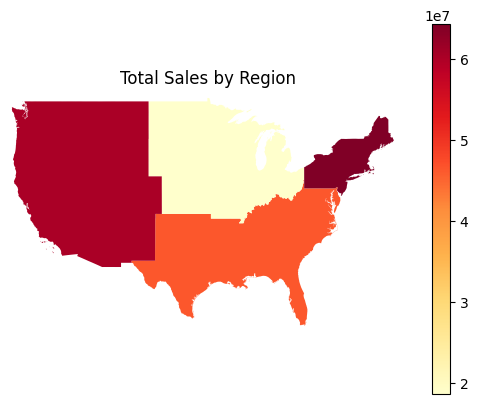

In [54]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np

# Use geopandas to read in the shapefile
us_regions = gpd.read_file('../docs/shapefiles/cb_2019_us_region_5m.shp')

# Load the Shapefile
gdf = gpd.read_file('../docs/shapefiles/cb_2019_us_region_5m.shp')

# Assuming your sales DataFrame is named df
dfgdf = regional_totals_df.groupby('Region')['Total Sales'].sum().reset_index()

# Merge the two DataFrames
merged = gdf.merge(dfgdf, left_on='NAME', right_on='Region')

# Create a new figure and axis
fig, ax = plt.subplots(1, 1)

# Plot the choropleth
merged.plot(column='Total Sales', cmap='YlOrRd', legend=True, figsize=(15, 10), ax=ax)

# Adjust x-axis limits
ax.set_xlim([-125, -65])
ax.set_ylim([25, 50])

# Add a title
plt.title('Total Sales by Region')

# Remove x-axis and y-axis
ax.set_axis_off()

# Save the figure
plt.savefig('../docs/images/total_sales_by_region.png')

# Show the plot
plt.show()


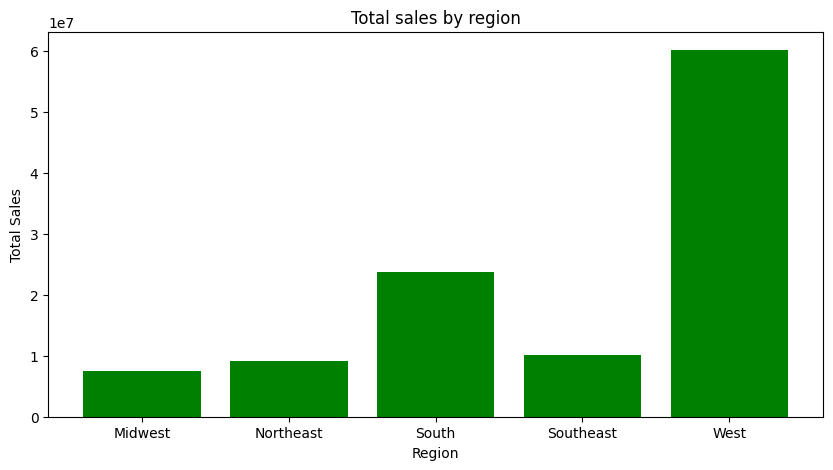

In [ ]:
import matplotlib.pyplot as plt
# Make a bar plot for Total sales by region
plt.figure(figsize=(10,5))
plt.bar(regional_totals_df['Region'], regional_totals_df['Total Sales'], color='green')
plt.title('Total sales by region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()


highest sales by state for each region - bar chart
totals by retailer - bar chart (?)
totals by product type - pie chart
totals by sales method type - pie chart
highest retailer by region - pie

In [66]:
import geopandas as gpd

# Load the shapefile
gdf1 = gpd.read_file('../docs/shapefiles/stateshp/cb_2018_us_state_500k.shp')

# Print the column names
print(gdf1.columns)


Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')


Text(0.5, 1.0, 'Highest Sales by State')

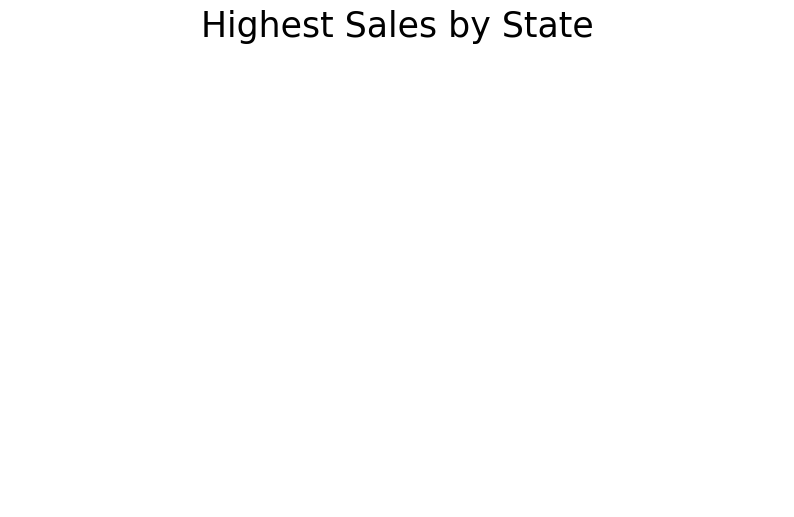

In [67]:
# Dependencies
import pandas as pd
# Highest Sales by state
# Formulate a dataframe with the highest sales by state
# Plot the highest sales by state
# Plot the highest sales by state in a pie chart
# Step 1: Call the raw csv file
raw_df = pd.read_csv('../data/adidas_sales_df.csv')
# Step 2: Create a dataframe with the highest sales by state
highest_sales_by_state_df = raw_df.groupby('State')['Total Sales'].sum().reset_index()
highest_sales_by_state_df
# Heatmap using geopandas
# Dependencies
import geopandas as gpd
import matplotlib.pyplot as plt
# Step 1: Call the raw csv file
raw_df = pd.read_csv('../data/adidas_sales_df.csv')
# Step 2: Create a dataframe with the highest sales by state
highest_sales_by_state_df = raw_df.groupby('State')['Total Sales'].sum().reset_index()
highest_sales_by_state_df
# Step 3: Call the shape file
shapefile = '../docs/shapefiles/stateshp/cb_2018_us_state_500k.shp'
# Columns of the file are: 'STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
#       'ALAND', 'AWATER', 'geometry'

